# **Análisis exploratorio sobre los datos**

En esta libreta, se recoge un análisis exploratorio sobre el dataset "fake and real news" de kaggle con el que se trabajará en este proyecto ([enlace a los datos](https://www.kaggle.com/datasets/clmentbisaillon/fake-and-real-news-dataset)).

## Indice

* [1. Carga y limpieza de datos](#section1)
* [2. Comprobar si el dataframe está equilibrado](#section2)
* [3. Número de noticias por año/mes](#section3)
* [4. Número de noticias por tema](#section4)
* [5. Número de noticias según el número de caracteres del título y del texto](#section5)
* [6. Palabras más frecuentes por tipo de noticia](#section6)
* [7. Posibles ampliaciones futuras](#section7)

In [ ]:
import pandas as pd
import openpyxl
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re

sns.set_theme(style="white")

<a id="section1"></a>

## 1. Carga y limpieza de datos

En primer lugar, se cargan las noticias reales en el dataframe ***df_true***. Existen 21417 noticias reales para las que se dispone de información sobre el título, el cuerpo de la noticia, el tema y la fecha de publicación. No hay datos nulos en ninguna de las columnas de este dataframe.

In [ ]:
df_true = pd.read_csv('../data/True.csv', sep=',', parse_dates=['date'])
df_true.info()
df_true.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   title    21417 non-null  object        
 1   text     21417 non-null  object        
 2   subject  21417 non-null  object        
 3   date     21417 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(3)
memory usage: 669.4+ KB


,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,2017-12-31
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,2017-12-29
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,2017-12-31
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,2017-12-30
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,2017-12-29


Se comprueba si existen noticias duplicadas en el dataframe ***df_true***.

In [ ]:
print('Número de duplicados - noticias reales: ', df_true.duplicated().sum())

Número de duplicados - noticias reales:  206


Se procede a borrar las noticias duplicadas que se han encontrado en este dataframe. Finalmente, se trabajará 21211 noticias reales.

In [ ]:
df_true = df_true.drop_duplicates(keep='first')
df_true.info()
df_true.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21211 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   title    21211 non-null  object        
 1   text     21211 non-null  object        
 2   subject  21211 non-null  object        
 3   date     21211 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(3)
memory usage: 828.6+ KB


,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,2017-12-31
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,2017-12-29
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,2017-12-31
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,2017-12-30
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,2017-12-29


A continuación, se cargan las noticias falsas en el dataframe ***df_false***. Existen 23481 noticias falsas para las que se dispone de la misma información que para las noticias reales (título, cuerpo, tema y fecha de publicación). En este caso, tampoco hay datos nulos en ninguna de las columnas del dataframe.

In [ ]:
df_fake = pd.read_csv('../data/Fake.csv', sep=',', parse_dates=['date'])
df_fake.info()
df_fake.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


Se comprueba si existen noticias duplicadas en el dataframe ***df_fake***.

In [ ]:
print('Número de duplicados - noticias falsas: ', df_fake.duplicated().sum())

Número de duplicados - noticias falsas:  3


Se procede a borrar las noticias duplicadas que se han encontrado en este dataframe. Finalmente, se trabajará 23478 noticias reales.

In [ ]:
df_fake = df_fake.drop_duplicates(keep='first')
df_fake.info()
df_fake.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23478 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23478 non-null  object
 1   text     23478 non-null  object
 2   subject  23478 non-null  object
 3   date     23478 non-null  object
dtypes: object(4)
memory usage: 917.1+ KB


,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


En el paso anterior, se intentó convertir la columna "date" del dataframe ***df_fake*** a datetime sin éxito. Se ha exportado el dataframe a Excel para analizar dónde está el problema y se ha identificado que esta columna contiene 10 valores que son URLs y no fechas (por ejemplo, https://100percentfedup.com/served-roy-moore-vietnamletter-veteran-sets-record-straight-honorable-decent-respectable-patriotic-commander-soldier/ o https://fedup.wpengine.com/wp-content/uploads/2015/04/hillarystreetart.jpg). Por tanto, se procede a eliminar estas filas del dataframe. El dataframe resultante contiene 23468 noticias y ahora la columna "date" sí es de tipo datetime.

In [ ]:
# df_fake.to_excel("df_fake.xlsx") # Sólo se ejecuta la primera vez
df_fake['date'] = pd.to_datetime(df_fake['date'], errors='coerce')
df_fake = df_fake.dropna(subset=['date'])
df_fake.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23468 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   title    23468 non-null  object        
 1   text     23468 non-null  object        
 2   subject  23468 non-null  object        
 3   date     23468 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(3)
memory usage: 916.7+ KB


Se añade la columna "class" a los dataframe anteriores (las noticias serán reales si class=0 y falsas si class=1), se crea ***df_news*** concatenando estos dataframes y se comprueba que su estructura es correcta.

In [ ]:
df_true['class'] = 0
df_fake['class'] = 1

df_news = pd.concat([df_true, df_fake])
df_news.info()
df_news.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44679 entries, 0 to 23480
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   title    44679 non-null  object        
 1   text     44679 non-null  object        
 2   subject  44679 non-null  object        
 3   date     44679 non-null  datetime64[ns]
 4   class    44679 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 2.0+ MB


,title,text,subject,date,class
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,2017-12-31,0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,2017-12-29,0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,2017-12-31,0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,2017-12-30,0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,2017-12-29,0


Se comprueba que no hay noticias sin título.

In [ ]:
mask_news_wo_title = df_news['title'].str.len() == 1
df_news_wo_title = df_news.loc[mask_news_wo_title]
df_news_wo_title.info()
df_news_wo_title.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   title    0 non-null      object        
 1   text     0 non-null      object        
 2   subject  0 non-null      object        
 3   date     0 non-null      datetime64[ns]
 4   class    0 non-null      int64         
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 0.0+ bytes


,title,text,subject,date,class


Se comprueba que hay 627 noticias que sólo presentan título y no texto (el texto aparece definido como un espacio).  A pesar de esto, se decide trabajar con ellas y no borrarlas.

In [ ]:
mask_news_wo_text = df_news['text'].str.len() == 1
df_news_wo_text = df_news.loc[mask_news_wo_text]
df_news_wo_text.info()
df_news_wo_text.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 627 entries, 8970 to 21873
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   title    627 non-null    object        
 1   text     627 non-null    object        
 2   subject  627 non-null    object        
 3   date     627 non-null    datetime64[ns]
 4   class    627 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 29.4+ KB


,title,text,subject,date,class
8970,Graphic: Supreme Court roundup,,politicsNews,2016-06-16,0
10923,TAKE OUR POLL: Who Do You Think President Trum...,,politics,2017-05-10,1
11041,Joe Scarborough BERATES Mika Brzezinski Over “...,,politics,2017-04-26,1
11190,WATCH TUCKER CARLSON Scorch Sanctuary City May...,,politics,2017-04-06,1
11225,MAYOR OF SANCTUARY CITY: Trump Trying To Make ...,,politics,2017-04-02,1


<a id="section2"></a>

# 2. Comprobar si el dataframe está equilibrado

Se crea un gráfico de sectores para analizar de forma visual si el dataframe ***df_news*** está equilibrado según la clase. En vista de este gráfico, se comprueba que los datos están bastante balanceados, lo que es importante a la hora de entrenar un modelo de clasificación.

In [ ]:
dict_class_as_text = {0: 'Reales', 1: 'Falsas'}

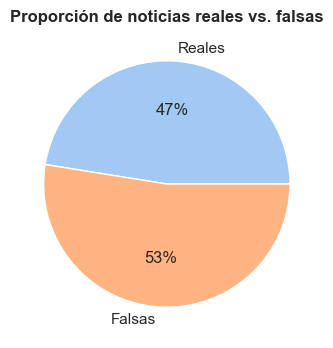

In [ ]:
df_news_pie = df_news.groupby(by='class')['title'].count().reset_index().rename(columns={'title': 'num_news'})
df_news_pie['class'] = df_news_pie['class'].apply(lambda x: dict_class_as_text[x])

plt.figure(figsize = (4, 4))

colors = sns.color_palette('pastel')[0:2]

plt.pie(df_news_pie['num_news'], labels = df_news_pie['class'], colors = colors, autopct='%.0f%%')
plt.title("Proporción de noticias reales vs. falsas", {"fontsize": 12, 'fontweight': 'bold'});
plt.show()

<a id="section3"></a>

# 3. Número de noticias por año/mes

Analizando el contenido de la columna "date" del dataframe ***df_news***, se observa que las fechas de publicación de las noticias reales están comprendidas entre el 13 de enero de 2016 y el 31 de diciembre de 2017, mientras que las fechas de publicación de las noticias falsas están comprendidas entre el 31 de marzo de 2015 y el 19 de febrero de 2018.

In [ ]:
real_news_first_date = df_news[df_news['class']==0]['date'].min()
print('Primera fecha - noticias reales: ', real_news_first_date)

real_news_last_date = df_news[df_news['class']==0]['date'].max()
print('Última fecha - noticias reales: ', real_news_last_date)

fake_news_first_date = df_news[df_news['class']==1]['date'].min()
print('Primera fecha - noticias falsas: ', fake_news_first_date)

fake_news_last_date = df_news[df_news['class']==1]['date'].max()
print('Última fecha - noticias falsas: ', fake_news_last_date)

Primera fecha - noticias reales:  2016-01-13 00:00:00
Última fecha - noticias reales:  2017-12-31 00:00:00
Primera fecha - noticias falsas:  2015-03-31 00:00:00
Última fecha - noticias falsas:  2018-02-19 00:00:00


A partir del siguiente gráfico de barras, se comprueba que el grueso de las noticias registradas en ***df_news*** está comprendido entre enero de 2016 y diciembre de 2017, habiendo un gran pico de noticias publicadas entre septiembre y diciembre de 2017.

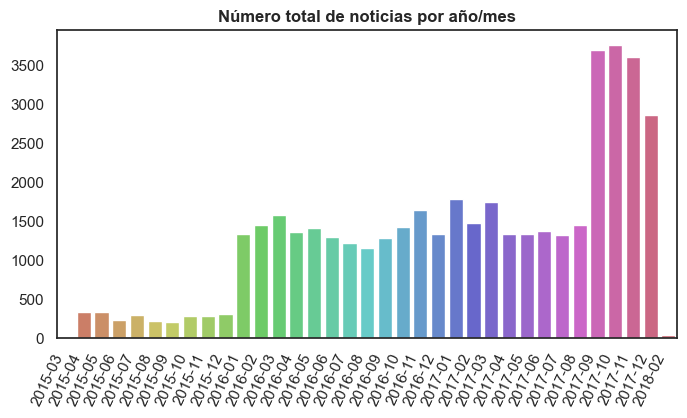

In [ ]:
# se añade una nueva columna con la fecha sin el día
df_news['date_wd'] = df_news['date'].apply(lambda x: x.strftime('%Y-%m'))

df_news_bar_date = df_news.groupby(by='date_wd')['title'].count().reset_index().rename(columns={'title': 'num_news'})

plt.figure(figsize = (8, 4))

sns.barplot(
    x = df_news_bar_date['date_wd'],
    y = df_news_bar_date['num_news'],
    palette  = 'hls'
)
plt.ylabel('')
plt.xlabel('')
plt.xticks(rotation = 65, ha='right')

plt.title('Número total de noticias por año/mes', {'fontsize': 12, 'fontweight': 'bold'});

El siguiente gráfico muestra que la distribución de noticias por clase no es uniforme mes a mes. Por ejemplo, entre marzo y diciembre de 2015 sólo hay noticias falsas, mientras que entre septiembre y diciembre de 2017, se observa un fuerte aumento de las noticias reales registradas.

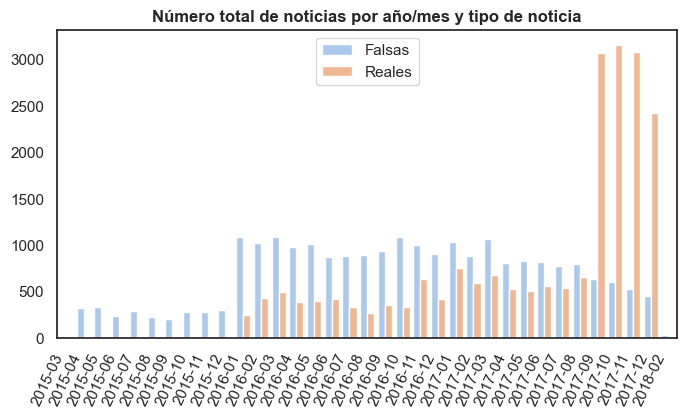

In [ ]:
df_news_bar_date_class = df_news.groupby(by=['date_wd', 'class'])['title'].count().reset_index().rename(columns={'title': 'num_news'})
df_news_bar_date_class['class'] = df_news_bar_date_class['class'].apply(lambda x: dict_class_as_text[x])

plt.figure(figsize = (8, 4))

sns.barplot(
    x = df_news_bar_date_class['date_wd'],
    y = df_news_bar_date_class['num_news'],
    hue = df_news_bar_date_class['class'],
    palette  = 'pastel'
)
plt.ylabel('')
plt.xlabel('')
plt.xticks(rotation = 65, ha='right')

plt.title('Número total de noticias por año/mes y tipo de noticia', {'fontsize': 12, 'fontweight': 'bold'})
plt.legend(title='');

<a id="section4"></a>

# 4. Número de noticias por tema

Las noticias aparecen clasificadas según 8 temas, siendo el tema con más noticias "politicsNews" seguido de "worldnews".

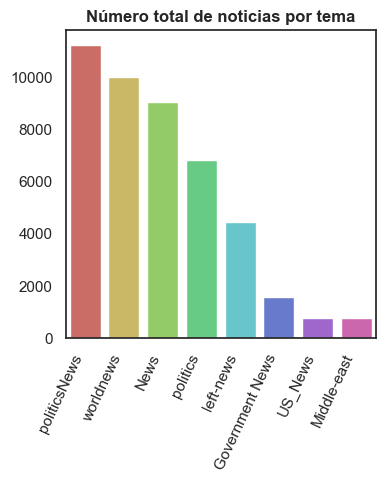

In [ ]:
df_news_bar_subject = df_news.groupby(by='subject')['title'].count().reset_index().rename(columns={'title': 'num_news'}).sort_values(by='num_news', ascending=False)

plt.figure(figsize = (4, 4))

sns.barplot(
    x = df_news_bar_subject['subject'],
    y = df_news_bar_subject['num_news'],
    palette  = 'hls'
)
plt.ylabel('')
plt.xlabel('')
plt.xticks(rotation = 65, ha='right')

plt.title('Número total de noticias por tema', {'fontsize': 12, 'fontweight': 'bold'});

Se ha creado un gráfico de barras para analizar la temática de las noticias según la clase y se ha observado que las noticias reales y falsas aparecen clasificadas con distinta temática. Todas las noticias reales aparecen clasificadas como "politicsNews" o "worldnews" mientras que las noticias falsas aparecen clasificadas en una de las restantes seis temáticas. En vista de estos resultados, parece que este criterio podría ser de gran utilidad para clasificar las noticias en reales o falsas, pero no se utilizará en adelante ya que esta clasificación se realizará sólo en base al contenido del título y del texto de las noticias.

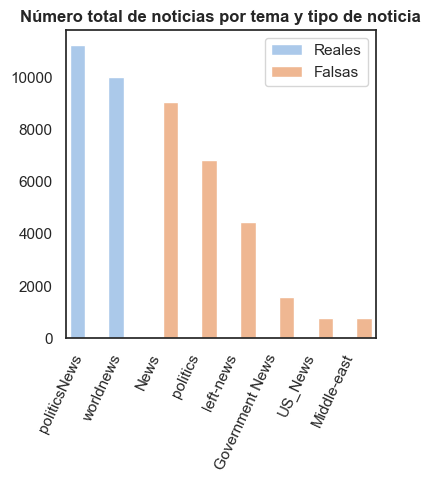

In [ ]:
df_news_bar_subject_class = df_news.groupby(by=['subject', 'class'])['title'].count().reset_index().rename(columns={'title': 'num_news'}).sort_values(by='num_news', ascending=False)
df_news_bar_subject_class['class'] = df_news_bar_subject_class['class'].apply(lambda x: dict_class_as_text[x])

plt.figure(figsize = (4, 4))

sns.barplot(
    x = df_news_bar_subject_class['subject'],
    y = df_news_bar_subject_class['num_news'],
    hue = df_news_bar_subject_class['class'],
    palette  = 'pastel'
)
plt.ylabel('')
plt.xlabel('')
plt.xticks(rotation = 65, ha='right')

plt.title('Número total de noticias por tema y tipo de noticia', {'fontsize': 12, 'fontweight': 'bold'})
plt.legend(title='');

<a id="section5"></a>

# 5. Número de noticias según el número de caracteres del título y del texto

La siguiente figura muestra una distribución del número de noticias (eje y) que presentan un número determinado de caracteres (eje x) en el título (figura de la izquierda) y en el texto (figura de la derecha). La gráfica de la izquierda muestra que la mayor parte de las noticias presentan un título cuya longitud está comprendida ente 50 y 100 caracteres, mientras que la gráfica de la derecha muestra que el cuerpo de las noticias suelen tener menos de 10000 caracteres.

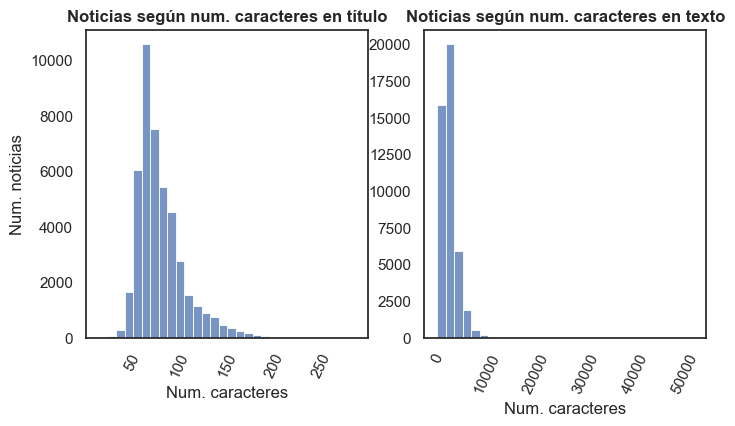

In [ ]:
# nueva columna con la longitud del título
df_news['len_title'] = df_news['title'].apply(lambda x: len(x))
# nueva columna con la longitud del texto
df_news['len_text'] = df_news['text'].apply(lambda x: len(x))


fig, ax =plt.subplots(1,2, figsize=(8, 4))

sns.histplot(data=df_news, x='len_title', bins=30, palette='pastel', ax=ax[0])
ax[0].set_xlabel('Num. caracteres')
ax[0].set_ylabel('Num. noticias')
ax[0].set_title('Noticias según num. caracteres en título', {'fontsize': 12, 'fontweight': 'bold'})
ax[0].tick_params(axis='x', rotation=65)

sns.histplot(data=df_news, x='len_text', bins=30, palette='pastel', ax=ax[1])
ax[1].set_xlabel('Num. caracteres')
ax[1].set_ylabel('')
ax[1].set_title('Noticias según num. caracteres en texto', {'fontsize': 12, 'fontweight': 'bold'})
ax[1].tick_params(axis='x', rotation=65)

plt.show();

La siguiente figura y los siguientes cálculos muestran que, en media, las noticias reales presenta un menor número de caracteres en el título que las noticias falsas.

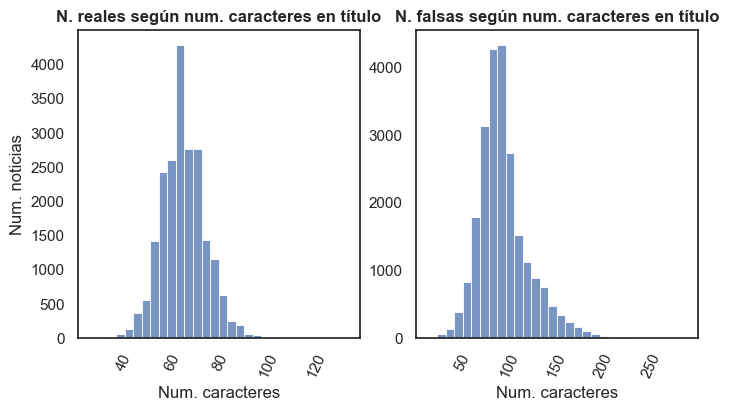

Longitud media (en num. de caracteres) del título para las noticias reales:  64.65829050964122
Longitud media (en num. de caracteres) del título para las noticias falsas:  94.19967615476394


In [ ]:
fig, ax =plt.subplots(1,2, figsize=(8, 4))

sns.histplot(data=df_news[df_news['class']==0], x='len_title', bins=30, palette='pastel', ax=ax[0])
ax[0].set_xlabel('Num. caracteres')
ax[0].set_ylabel('Num. noticias')
ax[0].set_title('N. reales según num. caracteres en título', {'fontsize': 12, 'fontweight': 'bold'})
ax[0].tick_params(axis='x', rotation=65)

sns.histplot(data=df_news[df_news['class']==1], x='len_title', bins=30, palette='pastel', ax=ax[1])
ax[1].set_xlabel('Num. caracteres')
ax[1].set_ylabel('')
ax[1].set_title('N. falsas según num. caracteres en título', {'fontsize': 12, 'fontweight': 'bold'})
ax[1].tick_params(axis='x', rotation=65)

plt.show();

len_title_real_news_mean = df_news[df_news['class']==0]['len_title'].mean()
print ('Longitud media (en num. de caracteres) del título para las noticias reales: ', len_title_real_news_mean)

len_title_fake_news_mean = df_news[df_news['class']==1]['len_title'].mean()
print ('Longitud media (en num. de caracteres) del título para las noticias falsas: ', len_title_fake_news_mean)

La siguiente figura y los siguientes cálculos muestran que, en media, las noticias reales también presenta un menor número de caracteres en el texto que las noticias falsas.

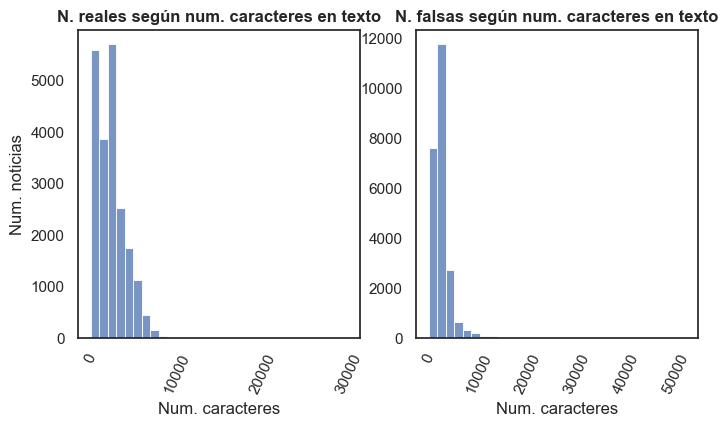

Longitud media (en num. de caracteres) del texto para las noticias reales:  2378.042336523502
Longitud media (en num. de caracteres) del texto para las noticias falsas:  2548.582623146412


In [ ]:
fig, ax =plt.subplots(1,2, figsize=(8, 4))

sns.histplot(data=df_news[df_news['class']==0], x='len_text', bins=30, palette='pastel', ax=ax[0])
ax[0].set_xlabel('Num. caracteres')
ax[0].set_ylabel('Num. noticias')
ax[0].set_title('N. reales según num. caracteres en texto', {'fontsize': 12, 'fontweight': 'bold'})
ax[0].tick_params(axis='x', rotation=65)

sns.histplot(data=df_news[df_news['class']==1], x='len_text', bins=30, palette='pastel', ax=ax[1])
ax[1].set_xlabel('Num. caracteres')
ax[1].set_ylabel('')
ax[1].set_title('N. falsas según num. caracteres en texto', {'fontsize': 12, 'fontweight': 'bold'})
ax[1].tick_params(axis='x', rotation=65)

plt.show();

len_text_real_news_mean = df_news[df_news['class']==0]['len_text'].mean()
print ('Longitud media (en num. de caracteres) del texto para las noticias reales: ', len_text_real_news_mean)

len_text_fake_news_mean = df_news[df_news['class']==1]['len_text'].mean()
print ('Longitud media (en num. de caracteres) del texto para las noticias falsas: ', len_text_fake_news_mean)

<a id="section6"></a>

# 6. Palabras más frecuentes por tipo de noticia

Se crea una columna adicional en el dataframe ***df_news*** con la concatenación del título y del texto con la que seguir trabajando.

In [ ]:
df_news['full_text'] = df_news['title'] + ' ' + df_news['text']

Se crea una función para limpiar todas las etiquetas HTML de un texto.

In [ ]:
def removeHTML(text):
    # se sustituyen las las etiquetas HTML por un espacio
    text = re.sub('<[^>]*>',' ', text)

    return text

Se usa esta función sobre la columna "full_text" del dataframe ***df_news***.

In [ ]:
df_news['full_text'] = df_news['full_text'].apply(removeHTML)

Se crea una función para limpiar texto.

In [ ]:
def clean(text):
    # se transforma todo el texto a minúsculas
    text = text.lower()
    # se sustituyen los grupos de caracteres que no contienen letras o números (como, por ejemplo, signos de puntuación o símbolos de moneda) por un espacio
    text = re.sub('[\W]+', ' ', text)
    # se sustituyen los números (como, por ejemplo, años o cantidades económicas) que aparezcan en el texto por un espacio
    text = re.sub('[\d]+', ' ', text)

    return text

Se usa la función anterior sobre la columna "full_text" del dataframe ***df_news*** (previamente borradas las etiquetas HTML).

In [ ]:
df_news['full_text'] = df_news['full_text'].apply(clean)

Se almacenan las stopwords (o palabras sin significado como artículos, preposiciones, etc.) en inglés para luego utilizarlas. Además, se crea el lemitizador que tranformará una forma flexionada de una palabra (por ejemplo, una forma en plural o en femenino) en la forma (o lema) que se acepta como representante de esa palabra por convenio.

In [ ]:
# Este bloque comentado sólo es necesario ejecutarlo la primera vez
# nltk.download('stopwords')
# nltk.download('punkt')
# nltk.download('wordnet')
# nltk.download('omw-1.4')

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

stopwords_en = stopwords.words('english')
lemmatizer = WordNetLemmatizer()

Se crear una función para extraer los términos relevantes de un texto.

In [ ]:
def extractTerms(text):
    # se extraen los token del texto
    text = word_tokenize(text)
    # se extrae el listado de palabras que no están incluidas dentro del listado de stopwords
    word_list = [word for word in text if word not in stopwords_en]
    # se realiza el proceso de lematización sobre el listado de palabras anterior
    lemmatized_word_list = [lemmatizer.lemmatize(word) for word in word_list]

    # se devuelve un texto con los elementos de la lista anterior
    return ' '.join(lemmatized_word_list)

Se usa la función anterior sobre la columna "full_text" del dataframe ***df_news*** (previamente limpiada).

In [ ]:
df_news['full_text'] = df_news['full_text'].apply(extractTerms)

Se contruye una nube de palabras con las 500 palabras más utilizadas en las noticias reales. A partir de este gráfico, se observa que las palabras que más aparecen son "united", "state", "donald", "trump", "white", "house" y "said" entre otras.

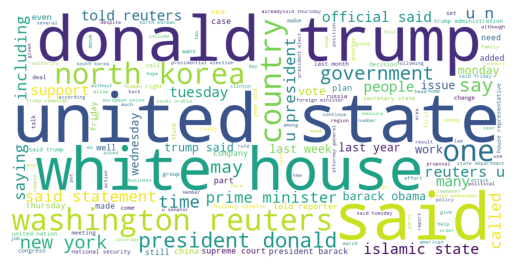

In [ ]:
from wordcloud import WordCloud, STOPWORDS

wordcloud = WordCloud(max_words= 500, width = 1000, height = 500,
                background_color ='white',
                stopwords = STOPWORDS,
                min_font_size = 10).generate(' '.join(df_news[df_news['class'] == 0]['full_text']))

plt.imshow(wordcloud)
plt.axis("off")
plt.show();

Se contruye una nube de palabras con las 500 palabras más utilizadas en las noticias falsas. A partir de este gráfico, se observa que las palabras que más aparecen con "donald", "trump", "said", "one", "even" y "say" entre otras y que parte de estas palabras coinciden con las que aparecían en el listado de palabras más frecuentes para las noticias reales (como, por ejemplo, "donald" y "trump"), por lo que no serán de utilidad en el proceso de clasificación de noticias si se tienen en cuenta sin más.

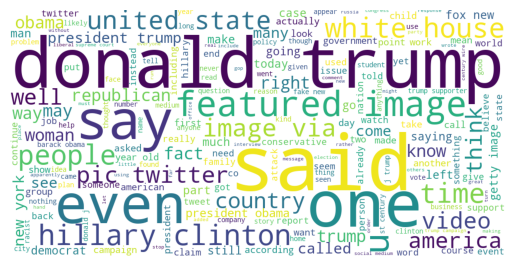

In [ ]:
wordcloud = WordCloud(max_words= 500, width = 1000, height = 500,
                background_color ='white',
                stopwords = STOPWORDS,
                min_font_size = 10).generate(' '.join(df_news[df_news['class'] == 1]['full_text']))

plt.imshow(wordcloud)
plt.axis("off")
plt.show();

<a id="section7"></a>

# 7. Conclusiones

A pesar de que el dataset está equilibrado, parece que las noticias que contiene no son homogeneas según fecha de publicación y tema. Esto puede introducir sesgos en la clasificación.